## Imports

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Load Data

In [38]:
store_df = pd.read_csv("googleplaystore.csv")
user_review_df = pd.read_csv("googleplaystore_user_reviews.csv")


## Part 2: drop not Translated_Review or no Sentiment

In [39]:

user_review_df = user_review_df.dropna(subset=['Sentiment', 'Translated_Review'])
user_review_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


## Part 3: Remove invalid ratings

In [40]:
store_df.dropna(subset=['Rating'])
store_df = store_df[(store_df['Rating'] >= 0) & (store_df['Rating'] <= 5)]
store_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Part 4: Android Versions Pie Chart

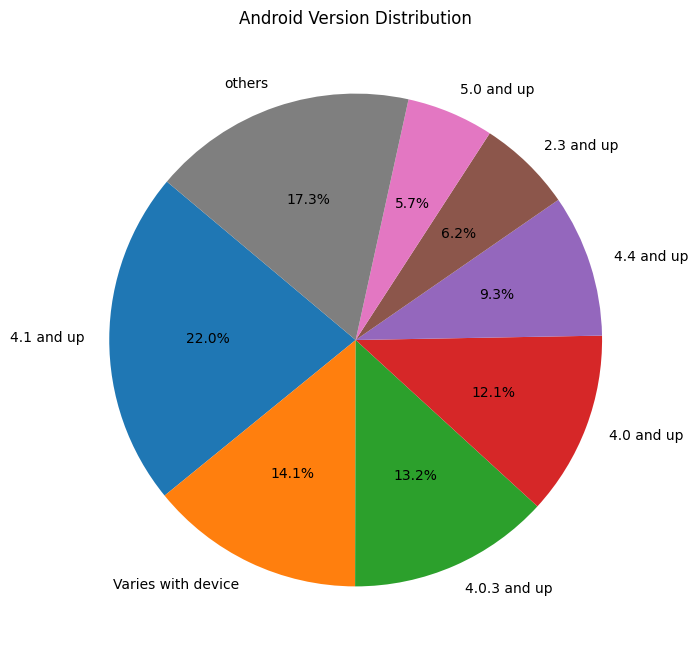

In [41]:
# Calculate the percentage of each Android version
version_counts = store_df['Android Ver'].value_counts(normalize=True)

# Separate versions into main and others
main_versions = version_counts[version_counts >= 0.05]
others = version_counts[version_counts < 0.05].sum()

# Create a new series with the main versions and the "others" category
final_versions = pd.concat([main_versions, pd.Series({'others': others})])


# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(final_versions, labels=final_versions.index, autopct='%1.1f%%', startangle=140)
plt.title('Android Version Distribution')
plt.show()

## Part 5: App Category Pie Chart

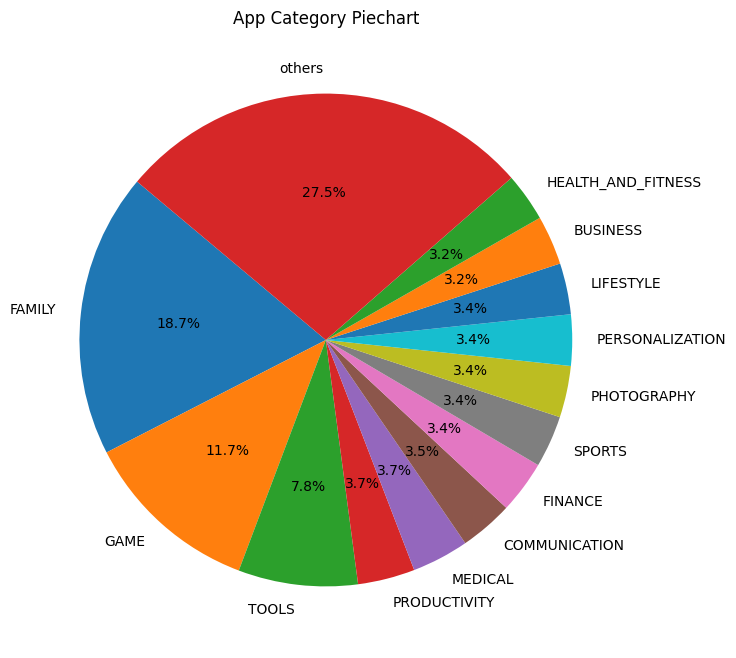

In [42]:
# Calculate the percentage of each category
category_counts = store_df['Category'].value_counts(normalize=True)

# Separate versions into main and others
main_categories = category_counts[category_counts >= 0.03]
others = category_counts[category_counts < 0.03].sum()

# Create a new series with the main versions and the "others" category
final_versions = pd.concat([main_categories, pd.Series({'others': others})])


# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(final_versions, labels=final_versions.index, autopct='%1.1f%%', startangle=140)
plt.title('App Category Piechart')
plt.show()

## Part 6: Rating and Reviews Side by Side

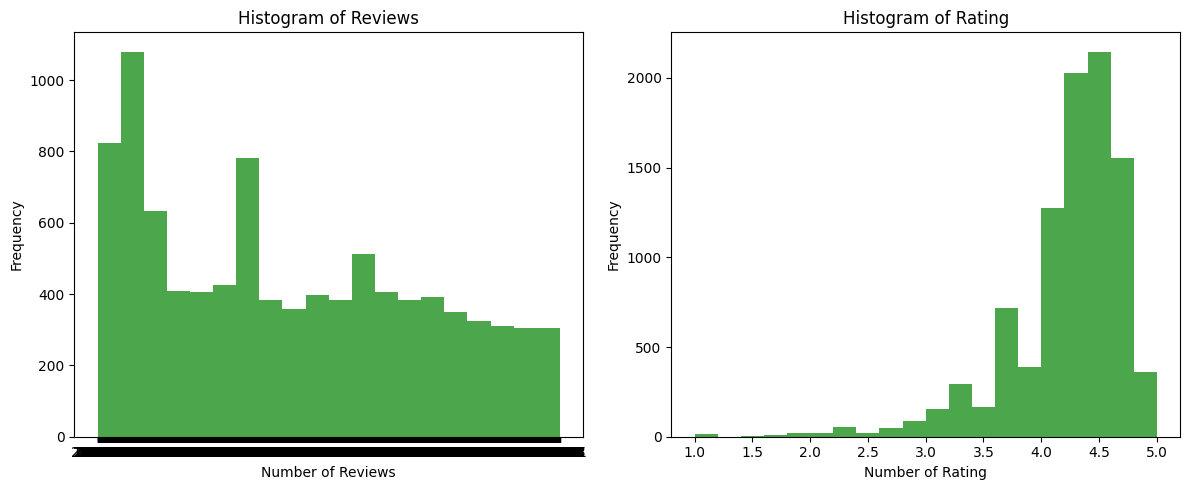

In [43]:

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram for Reviews from store_df
axes[0].hist(store_df['Reviews'], bins=20, color='green', alpha=0.7)
axes[0].set_title('Histogram of Reviews')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Frequency')


# Plot histogram for Reviews from store_df
axes[1].hist(store_df['Rating'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Histogram of Rating')
axes[1].set_xlabel('Number of Rating')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## Part 7: Sentiment Bar Chart

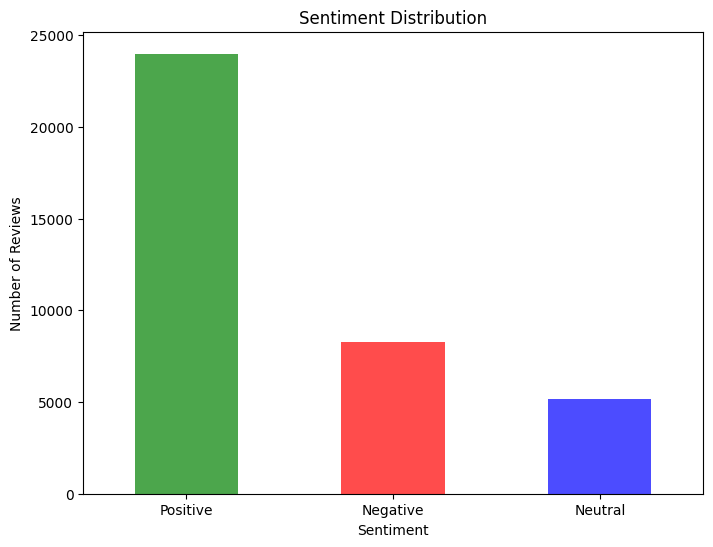

In [44]:
# Count the occurrences of each sentiment
sentiment_counts = user_review_df['Sentiment'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

## Part 8: Combine the two DataFrames

In [45]:
merged_df = store_df.merge(user_review_df, on='App', how='left')
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80699,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,NaN,NaN,NaN,NaN
80700,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,NaN,NaN,NaN,NaN
80701,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,NaN,NaN,NaN,NaN
80702,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN,NaN,NaN,NaN


## Part 9: Paid Games DataFrame

In [52]:
paid_game_df = store_df[store_df['Type'] == 'Paid']
paid_game_df = paid_game_df[paid_game_df['Category'] == 'GAME']
paid_game_df = paid_game_df.sort_values(by='Rating')
paid_game_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7887,CT-REMOTE,GAME,3.3,19,1.6M,100+,Paid,$4.49,Everyone,Action,"February 10, 2015",1.4,2.3 and up
6088,Wolf of the BF:Commando MOBILE,GAME,3.4,32,27M,"1,000+",Paid,$0.99,Everyone 10+,Arcade,"March 23, 2017",1.00.10,4.0 and up
7665,"Chinese Chess 3D Online (Xiangqi, 象棋, co tuong)",GAME,3.5,23,37M,"1,000+",Paid,$0.99,Everyone,Board,"December 27, 2017",2.2.1,4.1 and up
4901,Assassin's Creed Identity,GAME,3.7,42529,92M,"500,000+",Paid,$1.99,Teen,Action,"November 23, 2016",2.8.2,4.1 and up
9728,Sonic 4™ Episode I,GAME,3.7,8014,37M,"100,000+",Paid,$2.99,Everyone,Arcade,"April 4, 2016",1.5.0,2.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,The Room: Old Sins,GAME,4.9,21119,48M,"100,000+",Paid,$4.99,Everyone,Puzzle,"April 18, 2018",1.0.1,4.4 and up
7466,211:CK,GAME,5.0,8,38M,10+,Paid,$0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up
10697,Mu.F.O.,GAME,5.0,2,16M,1+,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
9056,Santa's Monster Shootout DX,GAME,5.0,4,33M,50+,Paid,$1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up
